# Wrangle Data
(Acquire and prepare)

This notebook contain steps needed to reproduce acquisition and preparation phases of data science pipeline. There is a CSV file needed to reproduce this steps. CSV file can be found at: https://data.cms.gov/provider-data/dataset/ka5z-ibe3

---
## Acquire

Everything we need to run the code blocks in this notebook are imported below. To run the code blocks in this report you will need numpy, pandas, matplotlib, seaborn and sklearn installed on your computer.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

After downloading csv file store it in the same folder as your notebook or remember the path so it can be inputted in the parenthesis.

In [2]:
df = pd.read_csv('inpatient_rehabilitation_facilities_12_2021/Inpatient_Rehabilitation_Facility-Conditions_Dec2021.csv')

Verify the import worked

In [3]:
df

,CMS Certification Number (CCN),Facility Name,Address Line 1,Address Line 2,City,State,Zip Code,County Name,Phone Number,CMS Region,Condition,Count,Footnote
0,013025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,NaN,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,All other conditions,346,NaN
1,013025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,NaN,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,Brain disease or condition (non-traumatic),150,NaN
2,013025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,NaN,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,Brain injury (traumatic),38,NaN
3,013025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,NaN,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,Hip or femur fracture,156,NaN
4,013025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,NaN,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,"Hip or knee replacement, amputation or other b...",329,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10588,713027,SAGE REHAB OF LAFAYETTE,"204 ENERGY PKWY, SUITE B",NaN,LAFAYETTE,LA,70508,Lafayette,(337) 446-4300,6,"Hip or knee replacement, amputation or other b...",Not Available,2.0
10589,713027,SAGE REHAB OF LAFAYETTE,"204 ENERGY PKWY, SUITE B",NaN,LAFAYETTE,LA,70508,Lafayette,(337) 446-4300,6,Nervous system disorder (excluding stroke),Not Available,2.0
10590,713027,SAGE REHAB OF LAFAYETTE,"204 ENERGY PKWY, SUITE B",NaN,LAFAYETTE,LA,70508,Lafayette,(337) 446-4300,6,Spinal cord disease or condition (non-traumatic),Not Available,2.0
10591,713027,SAGE REHAB OF LAFAYETTE,"204 ENERGY PKWY, SUITE B",NaN,LAFAYETTE,LA,70508,Lafayette,(337) 446-4300,6,Spinal cord injury (traumatic),Not Available,2.0


This is all we need for acquisition!

---
## Preparation

In this section we'll prepare data for exploration and modeling.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10593 entries, 0 to 10592
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CMS Certification Number (CCN)  10593 non-null  object 
 1   Facility Name                   10593 non-null  object 
 2   Address Line 1                  10593 non-null  object 
 3   Address Line 2                  639 non-null    object 
 4   City                            10593 non-null  object 
 5   State                           10593 non-null  object 
 6   Zip Code                        10593 non-null  int64  
 7   County Name                     10593 non-null  object 
 8   Phone Number                    10593 non-null  object 
 9   CMS Region                      10593 non-null  int64  
 10  Condition                       10593 non-null  object 
 11  Count                           10593 non-null  object 
 12  Footnote                        

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Zip Code,10593.0,53611.919286,26878.006572,674.0,32043.0,53405.0,76901.0,99508.0
CMS Region,10593.0,5.373832,2.169934,1.0,4.0,5.0,6.0,10.0
Footnote,4326.0,1.320157,0.466591,1.0,1.0,1.0,2.0,2.0


In [6]:
df.shape

(10593, 13)

In [7]:
df.isnull().sum()

CMS Certification Number (CCN)       0
Facility Name                        0
Address Line 1                       0
Address Line 2                    9954
City                                 0
State                                0
Zip Code                             0
County Name                          0
Phone Number                         0
CMS Region                           0
Condition                            0
Count                                0
Footnote                          6267
dtype: int64

### Takeaways:
- column names need to be fixed
- Count should be integer
- nulls in Address Line 2 and Footnote


#### Fix column names:
- make all columns lower case
- replace spaces with "_"
- verify changes were made

In [8]:
df.columns = [column.lower().replace(' ', '_').replace('-','_') for column in df]
df.columns

Index(['cms_certification_number_(ccn)', 'facility_name', 'address_line_1',
       'address_line_2', 'city', 'state', 'zip_code', 'county_name',
       'phone_number', 'cms_region', 'condition', 'count', 'footnote'],
      dtype='object')

#### Count:
 - Should be integer
 - count should be renamed since count is a function

In [14]:
df.rename(columns={'count':'number_of_instances'}, inplace=True)

In [18]:
df

,cms_certification_number_(ccn),facility_name,address_line_1,address_line_2,city,state,zip_code,county_name,phone_number,cms_region,condition,number_of_instances,footnote
0,013025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,NaN,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,All other conditions,346,NaN
1,013025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,NaN,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,Brain disease or condition (non-traumatic),150,NaN
2,013025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,NaN,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,Brain injury (traumatic),38,NaN
3,013025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,NaN,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,Hip or femur fracture,156,NaN
4,013025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,NaN,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,"Hip or knee replacement, amputation or other b...",329,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10588,713027,SAGE REHAB OF LAFAYETTE,"204 ENERGY PKWY, SUITE B",NaN,LAFAYETTE,LA,70508,Lafayette,(337) 446-4300,6,"Hip or knee replacement, amputation or other b...",Not Available,2.0
10589,713027,SAGE REHAB OF LAFAYETTE,"204 ENERGY PKWY, SUITE B",NaN,LAFAYETTE,LA,70508,Lafayette,(337) 446-4300,6,Nervous system disorder (excluding stroke),Not Available,2.0
10590,713027,SAGE REHAB OF LAFAYETTE,"204 ENERGY PKWY, SUITE B",NaN,LAFAYETTE,LA,70508,Lafayette,(337) 446-4300,6,Spinal cord disease or condition (non-traumatic),Not Available,2.0
10591,713027,SAGE REHAB OF LAFAYETTE,"204 ENERGY PKWY, SUITE B",NaN,LAFAYETTE,LA,70508,Lafayette,(337) 446-4300,6,Spinal cord injury (traumatic),Not Available,2.0


Let's change number_of_instances to int. First we should check the values on the column

In [21]:
df.number_of_instances.value_counts()

Less than 11     2941
Not Available    1385
12                200
11                200
14                186
                 ... 
238                 1
360                 1
339                 1
286                 1
317                 1
Name: number_of_instances, Length: 322, dtype: int64

Not available and less than 11 are not in numeric value. We can make 'Less than 11' into '10' and 'Not Available' into '0'

In [25]:
df.number_of_instances.replace({'Less than 11':'10', 'Not Available':'0'}, inplace=True)

Verify the chages were made

In [26]:
df.number_of_instances.value_counts()

10     2941
0      1385
12      200
11      200
14      186
       ... 
238       1
360       1
339       1
286       1
317       1
Name: number_of_instances, Length: 322, dtype: int64

Now it's ready to change into "int" type

In [30]:
df = df.astype({'number_of_instances':'int'})

Get the columns that do not have any nulls. Visualize and look at the data

In [36]:
df [df.columns[(df.isnull().sum() == 0)]]

,cms_certification_number_(ccn),facility_name,address_line_1,city,state,zip_code,county_name,phone_number,cms_region,condition,number_of_instances
0,013025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,All other conditions,346
1,013025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,Brain disease or condition (non-traumatic),150
2,013025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,Brain injury (traumatic),38
3,013025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,Hip or femur fracture,156
4,013025,ENCOMPASS HEALTH LAKESHORE REHABILITATION HOSP...,3800 RIDGEWAY DRIVE,BIRMINGHAM,AL,35209,Jefferson,(205) 868-2000,4,"Hip or knee replacement, amputation or other b...",329
...,...,...,...,...,...,...,...,...,...,...,...
10588,713027,SAGE REHAB OF LAFAYETTE,"204 ENERGY PKWY, SUITE B",LAFAYETTE,LA,70508,Lafayette,(337) 446-4300,6,"Hip or knee replacement, amputation or other b...",0
10589,713027,SAGE REHAB OF LAFAYETTE,"204 ENERGY PKWY, SUITE B",LAFAYETTE,LA,70508,Lafayette,(337) 446-4300,6,Nervous system disorder (excluding stroke),0
10590,713027,SAGE REHAB OF LAFAYETTE,"204 ENERGY PKWY, SUITE B",LAFAYETTE,LA,70508,Lafayette,(337) 446-4300,6,Spinal cord disease or condition (non-traumatic),0
10591,713027,SAGE REHAB OF LAFAYETTE,"204 ENERGY PKWY, SUITE B",LAFAYETTE,LA,70508,Lafayette,(337) 446-4300,6,Spinal cord injury (traumatic),0


#### Visualize

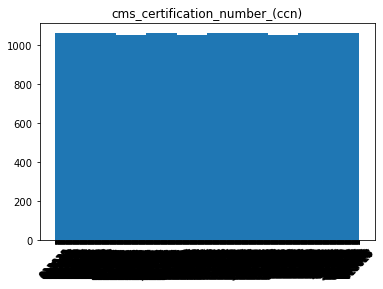

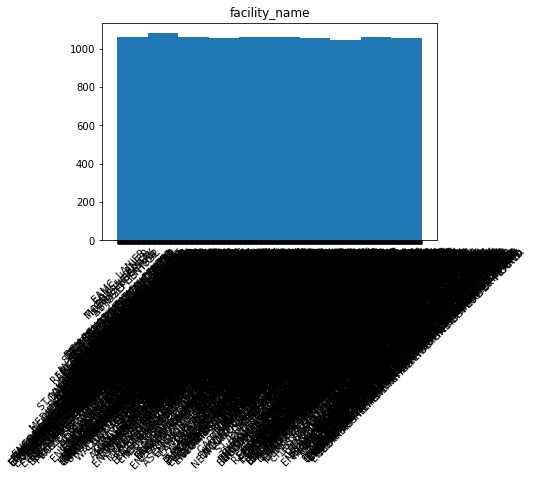

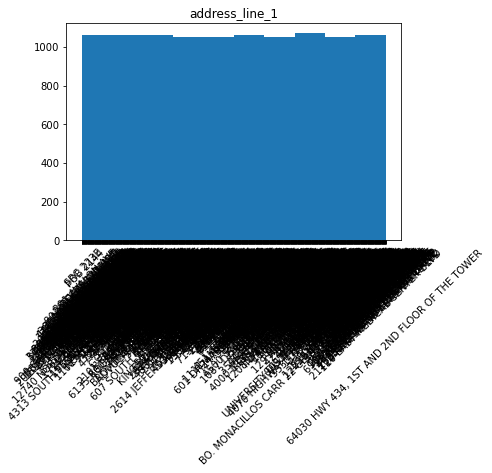

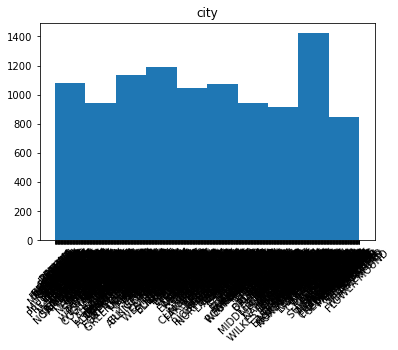

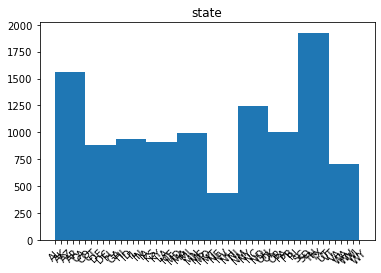

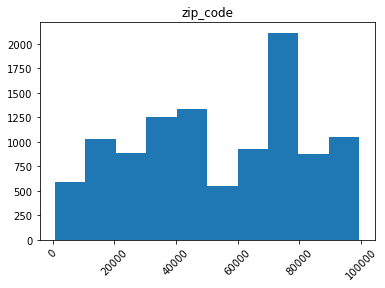

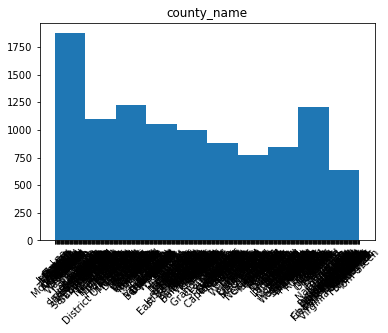

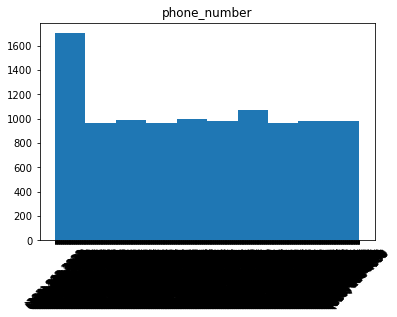

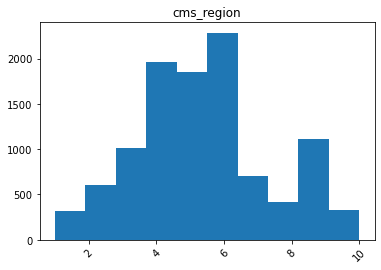

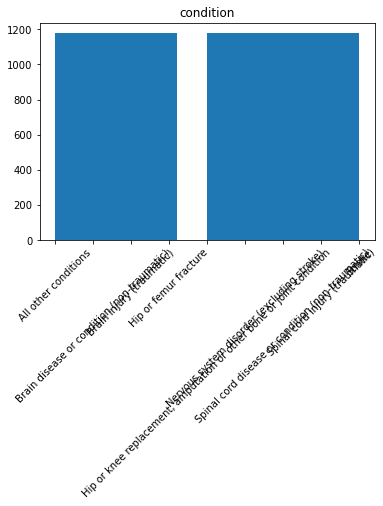

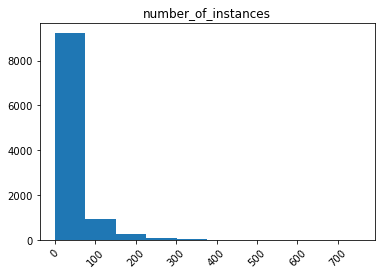

In [49]:
# List of columns
cols = df [df.columns[(df.isnull().sum() == 0)]]
for col in cols:
   
    # Title with columns name.
    plt.title(col)
    # histogram of each column 
    plt.hist(df[col])
    plt.xticks(rotation=45)
    plt.show()


#### Value Counts

In [39]:
for col in cols:
    print(col)
    print(df[col].value_counts())
    print('------------------------')

cms_certification_number_(ccn)
013025    9
373035    9
37T089    9
37T056    9
37T049    9
         ..
17T142    9
17T137    9
17T120    9
17T103    9
713027    9
Name: cms_certification_number_(ccn), Length: 1177, dtype: int64
------------------------
facility_name
GOOD SAMARITAN HOSPITAL                              27
ST JOSEPH HOSPITAL                                   18
MERCY MEDICAL CENTER                                 18
ST VINCENT HOSPITAL                                  18
BAYLOR SCOTT & WHITE INSTITUTE FOR REHABILITATION    18
                                                     ..
MENORAH MEDICAL CENTER                                9
WESTERN PLAINS MEDICAL COMPLEX                        9
VIA CHRISTI HOSP MANHATTAN                            9
LABETTE COUNTY MEDICAL CENTER                         9
SAGE REHAB OF LAFAYETTE                               9
Name: facility_name, Length: 1161, dtype: int64
------------------------
address_line_1
2000 HOSPITAL DR             

### Takeaways:
- CNN column has 9 columns per facility
- several facilities with the same name
- several facilities with the same address, but in different city
- 9 conditions 
- 10 regions
- 52 states ??


We can drop:
- facility_name
- phone_number
- address_line 1 & 2
- zip_code

In [52]:
columns_to_drop = ['phone_number', 'address_line_1', 'address_line_2', 'facility_name', 'zip_code']
df.drop(columns=columns_to_drop, inplace=True)

In [53]:
df

,cms_certification_number_(ccn),city,state,county_name,cms_region,condition,number_of_instances,footnote
0,013025,BIRMINGHAM,AL,Jefferson,4,All other conditions,346,NaN
1,013025,BIRMINGHAM,AL,Jefferson,4,Brain disease or condition (non-traumatic),150,NaN
2,013025,BIRMINGHAM,AL,Jefferson,4,Brain injury (traumatic),38,NaN
3,013025,BIRMINGHAM,AL,Jefferson,4,Hip or femur fracture,156,NaN
4,013025,BIRMINGHAM,AL,Jefferson,4,"Hip or knee replacement, amputation or other b...",329,NaN
...,...,...,...,...,...,...,...,...
10588,713027,LAFAYETTE,LA,Lafayette,6,"Hip or knee replacement, amputation or other b...",0,2.0
10589,713027,LAFAYETTE,LA,Lafayette,6,Nervous system disorder (excluding stroke),0,2.0
10590,713027,LAFAYETTE,LA,Lafayette,6,Spinal cord disease or condition (non-traumatic),0,2.0
10591,713027,LAFAYETTE,LA,Lafayette,6,Spinal cord injury (traumatic),0,2.0


Fill null values from footnote with 0

In [56]:
df = df.fillna(0)

In [57]:
df

,cms_certification_number_(ccn),city,state,county_name,cms_region,condition,number_of_instances,footnote
0,013025,BIRMINGHAM,AL,Jefferson,4,All other conditions,346,0.0
1,013025,BIRMINGHAM,AL,Jefferson,4,Brain disease or condition (non-traumatic),150,0.0
2,013025,BIRMINGHAM,AL,Jefferson,4,Brain injury (traumatic),38,0.0
3,013025,BIRMINGHAM,AL,Jefferson,4,Hip or femur fracture,156,0.0
4,013025,BIRMINGHAM,AL,Jefferson,4,"Hip or knee replacement, amputation or other b...",329,0.0
...,...,...,...,...,...,...,...,...
10588,713027,LAFAYETTE,LA,Lafayette,6,"Hip or knee replacement, amputation or other b...",0,2.0
10589,713027,LAFAYETTE,LA,Lafayette,6,Nervous system disorder (excluding stroke),0,2.0
10590,713027,LAFAYETTE,LA,Lafayette,6,Spinal cord disease or condition (non-traumatic),0,2.0
10591,713027,LAFAYETTE,LA,Lafayette,6,Spinal cord injury (traumatic),0,2.0


Make it into a function so that we can use it for exploration.

In [60]:
def wrangle():
    
    # Acquire data from csv
    df = pd.read_csv('inpatient_rehabilitation_facilities_12_2021/Inpatient_Rehabilitation_Facility-Conditions_Dec2021.csv')
    
    # clean columns
    df.columns = [column.lower().replace(' ', '_').replace('-','_') for column in df]
    
    # make count column easy to work with
    df.rename(columns={'count':'number_of_instances'}, inplace=True)
    df.number_of_instances.replace({'Less than 11':'10', 'Not Available':'0'}, inplace=True)
    df = df.astype({'number_of_instances':'int'})
    
    # drop unnecessary columns
    columns_to_drop = ['phone_number', 'address_line_1', 'address_line_2', 'facility_name', 'zip_code']
    df.drop(columns=columns_to_drop, inplace=True)
    
    # fill nulls with 0
    df = df.fillna(0)
    
    # return clean Dataframe
    return df

Ensure Function works

In [89]:
df1 = wrangle()

In [90]:
df1

,cms_certification_number_(ccn),city,state,county_name,cms_region,condition,number_of_instances,footnote
0,013025,BIRMINGHAM,AL,Jefferson,4,All other conditions,346,0.0
1,013025,BIRMINGHAM,AL,Jefferson,4,Brain disease or condition (non-traumatic),150,0.0
2,013025,BIRMINGHAM,AL,Jefferson,4,Brain injury (traumatic),38,0.0
3,013025,BIRMINGHAM,AL,Jefferson,4,Hip or femur fracture,156,0.0
4,013025,BIRMINGHAM,AL,Jefferson,4,"Hip or knee replacement, amputation or other b...",329,0.0
...,...,...,...,...,...,...,...,...
10588,713027,LAFAYETTE,LA,Lafayette,6,"Hip or knee replacement, amputation or other b...",0,2.0
10589,713027,LAFAYETTE,LA,Lafayette,6,Nervous system disorder (excluding stroke),0,2.0
10590,713027,LAFAYETTE,LA,Lafayette,6,Spinal cord disease or condition (non-traumatic),0,2.0
10591,713027,LAFAYETTE,LA,Lafayette,6,Spinal cord injury (traumatic),0,2.0


Pull the original dataframe to compare

In [91]:
df

,cms_certification_number_(ccn),city,state,county_name,cms_region,condition,number_of_instances,footnote
0,013025,BIRMINGHAM,AL,Jefferson,4,All other conditions,346,0.0
1,013025,BIRMINGHAM,AL,Jefferson,4,Brain disease or condition (non-traumatic),150,0.0
2,013025,BIRMINGHAM,AL,Jefferson,4,Brain injury (traumatic),38,0.0
3,013025,BIRMINGHAM,AL,Jefferson,4,Hip or femur fracture,156,0.0
4,013025,BIRMINGHAM,AL,Jefferson,4,"Hip or knee replacement, amputation or other b...",329,0.0
...,...,...,...,...,...,...,...,...
10588,713027,LAFAYETTE,LA,Lafayette,6,"Hip or knee replacement, amputation or other b...",0,2.0
10589,713027,LAFAYETTE,LA,Lafayette,6,Nervous system disorder (excluding stroke),0,2.0
10590,713027,LAFAYETTE,LA,Lafayette,6,Spinal cord disease or condition (non-traumatic),0,2.0
10591,713027,LAFAYETTE,LA,Lafayette,6,Spinal cord injury (traumatic),0,2.0


They both have 10593 rows and 8 columns at least for this preview they look identical

In [95]:
df1[(df1.state == 'TX')==True]

,cms_certification_number_(ccn),city,state,county_name,cms_region,condition,number_of_instances,footnote
8514,453025,HOUSTON,TX,Harris,6,All other conditions,38,0.0
8515,453025,HOUSTON,TX,Harris,6,Brain disease or condition (non-traumatic),59,0.0
8516,453025,HOUSTON,TX,Harris,6,Brain injury (traumatic),56,0.0
8517,453025,HOUSTON,TX,Harris,6,Hip or femur fracture,23,0.0
8518,453025,HOUSTON,TX,Harris,6,"Hip or knee replacement, amputation or other b...",26,0.0
...,...,...,...,...,...,...,...,...
10561,67T055,SAN ANTONIO,TX,Bexar,6,"Hip or knee replacement, amputation or other b...",79,0.0
10562,67T055,SAN ANTONIO,TX,Bexar,6,Nervous system disorder (excluding stroke),37,0.0
10563,67T055,SAN ANTONIO,TX,Bexar,6,Spinal cord disease or condition (non-traumatic),36,0.0
10564,67T055,SAN ANTONIO,TX,Bexar,6,Spinal cord injury (traumatic),10,1.0
